In [406]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns

In [407]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [408]:
#Read in data and get rid of improper ddatapoints
data_df = pd.read_csv('Sere_et_al_2015_Isle_de_la_Reunion_Disease_Data.csv')
mask = data_df['Endozoicomonas_tissue'] == 'Unknown'
data_df = data_df[~mask]
data_df = data_df.dropna()
#print(data_df.to_markdown())

In [409]:
#Transform data to proper data type
data_df['abundance'] = pd.to_numeric(data_df['abundance'], downcast='integer', errors='coerce')
data_df['Endozoicomonas_tissue'] = pd.to_numeric(data_df['Endozoicomonas_tissue'], downcast='integer', errors='coerce')
data_df['disease_prevalence'] = pd.to_numeric(data_df['disease_prevalence'], downcast='integer', errors='coerce')
display(data_df.dtypes)
#print(data_df.to_markdown())

Genus                     object
abundance                float64
disease_prevalence       float64
Region                    object
Reef_Part                 object
Source                    object
Endozoicomonas_tissue    float64
dtype: object

In [410]:
#Rename columns to be more appropiate for display
data_df.rename(columns={'abundance': 'Disease Abundance', 'Reef_Part': "Reef Section",
                    'Endozoicomonas_tissue': 'Endozoicomonas Tissue'}, inplace=True)

In [411]:
#Scatter plots to find correlation between disease and microbe abundance
#With the resulting regression line and a 95% confidence interval for that regression
#Done for each region to compare interregionial data

Text(0.5, 1.0, 'Reunion: Endozoicomonas vs. Disease Abundance')

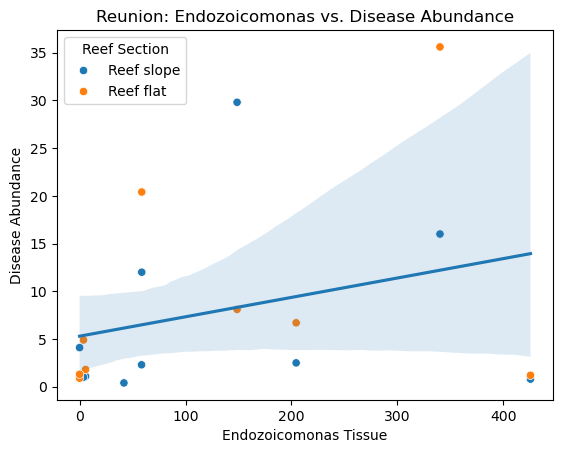

In [412]:
#Region: Reunion
R_df = data_df.query("Region == 'Reunion'")
ax0 = sns.scatterplot(x='Endozoicomonas Tissue', y='Disease Abundance', data = R_df, hue='Reef Section')
sns.regplot(data=R_df, x='Endozoicomonas Tissue', y='Disease Abundance', scatter=False, ax=ax0)
plt.title('Reunion: Endozoicomonas vs. Disease Abundance')

Text(0.5, 1.0, 'South Africa: Endozoicomonas vs. Disease Abundance')

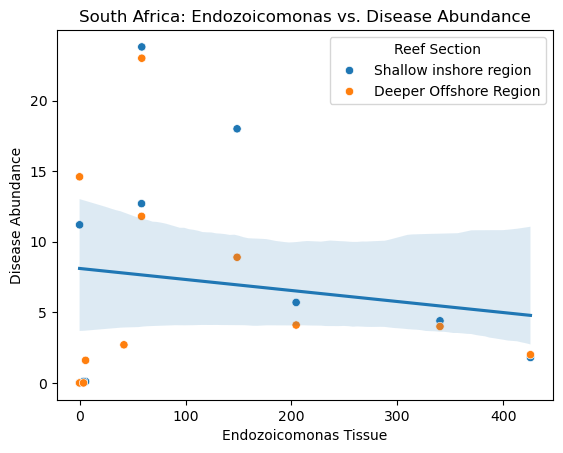

In [413]:
#Region: South Africa
SA_df = data_df.query("Region == 'South Africa'")
ax1 = sns.scatterplot(x='Endozoicomonas Tissue', y='Disease Abundance', data = SA_df, hue='Reef Section')
sns.regplot(data=SA_df, x='Endozoicomonas Tissue', y='Disease Abundance', scatter=False, ax=ax1)
plt.title('South Africa: Endozoicomonas vs. Disease Abundance')

Text(0.5, 1.0, 'Mayotte: Endozoicomonas vs. Disease Abundance')

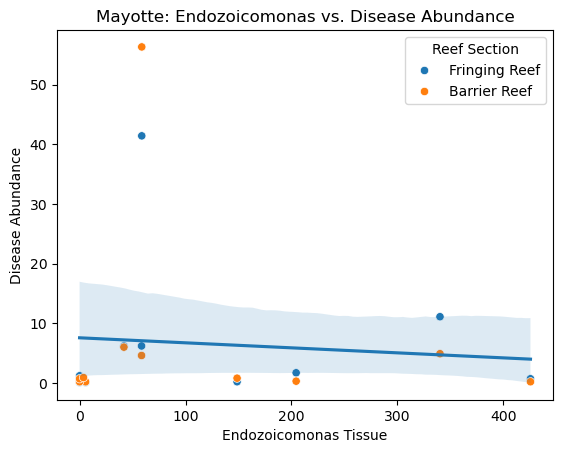

In [414]:
#Region: Mayotte
M_df = data_df.query("Region == 'Mayotte'")
ax2 = sns.scatterplot(x='Endozoicomonas Tissue', y='Disease Abundance', data = M_df, hue='Reef Section')
sns.regplot(data=M_df, x='Endozoicomonas Tissue', y='Disease Abundance', scatter=False, ax=ax2)
plt.title('Mayotte: Endozoicomonas vs. Disease Abundance')

In [415]:
#Statistical Analysis, Coefficient of correlation between disease and microbe variables

#The coefficient returns a value between -1 and 1, symbolizing the full spectrum of correlation: 
#from a complete negative correlation to a total positive correlation. A value of 0 means no 
#correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates 
#a notable correlation, and values below those values suggests a less notable correlation.

# calculate Pearson's correlation: Reunion
Rcorr, _ = pearsonr(R_df['Endozoicomonas Tissue'], R_df['Disease Abundance'])
print('Reunion: Pearsons correlation: %.3f' % Rcorr)

# calculate Pearson's correlation: South Africa
SAcorr, _ = pearsonr(SA_df['Endozoicomonas Tissue'], SA_df['Disease Abundance'])
print('South Africca: Pearsons correlation: %.3f' % SAcorr)

# calculate Pearson's correlation: Mayotte
Mcorr, _ = pearsonr(M_df['Endozoicomonas Tissue'], M_df['Disease Abundance'])
print('Mayotte: Pearsons correlation: %.3f' % Mcorr)

# calculate Pearson's correlation: All
corr, _ = pearsonr(data_df['Endozoicomonas Tissue'], data_df['Disease Abundance'])
print('(disregard?) All: Pearsons correlation: %.3f' % corr)

#correlation is seemingly insiginificant due to none of the region's data passing the 
#threshold individually or together

Reunion: Pearsons correlation: 0.295
South Africca: Pearsons correlation: -0.151
Mayotte: Pearsons correlation: -0.086
(disregard?) All: Pearsons correlation: 0.015
